# Homework

**`step one`**:
\
save a copy of the notebook in your drive and save it by your name: <pandas_HW_\<ur name>

\

using the heart disease dataset:

- load the dataset csv file into a pandas dataframe   
- print the dataframe
- remove the id column from the data frame
- split the following columns {age, gender, height, width, cholesterol, smoke} into a seprate dataframe     
- split the cardio column into a seprate data series and convert it to dummy variable dataframe
- preprocess the features by applying standarization and normalization
- preprocess the target by applying one hot encoding



In [80]:
import pandas as pd
import seaborn as sns       # use it to plot confusion matrix of correlation
import matplotlib.pyplot as plt

In [81]:
dlink = "https://raw.githubusercontent.com/caravanuden/cardio/master/cardio_train.csv"

#load the dataset csv file into a pandas dataframe 
df = pd.read_csv(dlink, delimiter=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [82]:
# drop the id column
df = df.drop('id', axis=1)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [83]:
# split the following columns {age, gender, height, width, cholesterol, smoke} into a seprate dataframe 

cols = ['age', 'gender', 'height', 'weight', 'cholesterol', 'smoke']
sub_df = df[cols]
sub_df

,age,gender,height,weight,cholesterol,smoke
0,18393,2,168,62.0,1,0
1,20228,1,156,85.0,3,0
2,18857,1,165,64.0,3,0
3,17623,2,169,82.0,1,0
4,17474,1,156,56.0,1,0
...,...,...,...,...,...,...
69995,19240,2,168,76.0,1,1
69996,22601,1,158,126.0,2,0
69997,19066,2,183,105.0,3,0
69998,22431,1,163,72.0,1,0


In [84]:
# split the cardio column into a seprate data series and convert it to dummy variable dataframe

target = df.pop('cardio')
dummied_target = pd.get_dummies(target)
dummied_target

,0,1
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
69995,1,0
69996,0,1
69997,0,1
69998,0,1


In [85]:
# preprocess the target by applying one hot encoding
# convert numerical target to textual 
# use sklearn to convert text to one hot encoding
# save it into new data frame
conv_dict =  {1: "positive", 0: "negative"}
obj_target = target.replace(conv_dict)

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

d = enc.fit_transform(obj_target.values.reshape(-1, 1)).toarray() # toarray() convert sparse matrix , values convert series to array

one_df = pd.DataFrame(d, columns=['pos_target', 'neg_target'])
one_df

,pos_target,neg_target
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
...,...,...
69995,1.0,0.0
69996,0.0,1.0
69997,0.0,1.0
69998,0.0,1.0


In [86]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0


In [87]:
# preprocess the features by applying standarization the src dataframe

std_df = (df - df.mean())/ (df.std())
std_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,-0.436058,1.364045,0.443449,-0.847867,-0.122181,-0.088238,-0.539318,-0.395717,-0.310877,-0.238383,0.494164
1,0.307684,-0.733103,-1.018161,0.749826,0.072610,-0.035180,2.400776,-0.395717,-0.310877,-0.238383,0.494164
2,-0.247995,-0.733103,0.078046,-0.708937,0.007679,-0.141296,2.400776,-0.395717,-0.310877,-0.238383,-2.023592
3,-0.748147,1.364045,0.565250,0.541431,0.137540,0.017878,-0.539318,-0.395717,-0.310877,-0.238383,0.494164
4,-0.808538,-0.733103,-1.018161,-1.264657,-0.187111,-0.194354,-0.539318,-0.395717,-0.310877,-0.238383,-2.023592
...,...,...,...,...,...,...,...,...,...,...,...
69995,-0.092761,1.364045,0.443449,0.124642,-0.057251,-0.088238,-0.539318,-0.395717,3.216661,-0.238383,0.494164
69996,1.269483,-0.733103,-0.774559,3.597887,0.072610,-0.035180,0.930729,1.351709,-0.310877,-0.238383,0.494164
69997,-0.163285,1.364045,2.270461,2.139124,0.332331,-0.035180,2.400776,-0.395717,-0.310877,4.194876,-2.023592
69998,1.200580,-0.733103,-0.165555,-0.153218,0.040145,-0.088238,-0.539318,1.351709,-0.310877,-0.238383,-2.023592


In [88]:
# preprocess the features by applying normalization on the src dataframe

nor_df = (df - df.min()) / (df.max() - df.min())
nor_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0.588076,1.0,0.579487,0.273684,0.016079,0.013550,0.0,0.0,0.0,0.0,1.0
1,0.730159,0.0,0.517949,0.394737,0.017934,0.014453,1.0,0.0,0.0,0.0,1.0
2,0.624003,0.0,0.564103,0.284211,0.017316,0.012647,1.0,0.0,0.0,0.0,0.0
3,0.528455,1.0,0.584615,0.378947,0.018553,0.015357,0.0,0.0,0.0,0.0,1.0
4,0.516918,0.0,0.517949,0.242105,0.015461,0.011743,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
69995,0.653659,1.0,0.579487,0.347368,0.016698,0.013550,0.0,0.0,1.0,0.0,1.0
69996,0.913899,0.0,0.528205,0.610526,0.017934,0.014453,0.5,0.5,0.0,0.0,1.0
69997,0.640186,1.0,0.656410,0.500000,0.020408,0.014453,1.0,0.0,0.0,1.0,0.0
69998,0.900736,0.0,0.553846,0.326316,0.017625,0.013550,0.0,0.5,0.0,0.0,0.0


In [89]:
# compute correlation between all features

df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476


# Bonus Tasks

## Rescale the age
Map the age column from days to years


In [90]:
# Map the age column from days to years

df['age'] = df['age'].apply(lambda x:x/365).astype('int32') # use apply() to convert days to years
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50,2,168,62.0,110,80,1,1,0,0,1
1,55,1,156,85.0,140,90,3,1,0,0,1
2,51,1,165,64.0,130,70,3,1,0,0,0
3,48,2,169,82.0,150,100,1,1,0,0,1
4,47,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1
69996,61,1,158,126.0,140,90,2,2,0,0,1
69997,52,2,183,105.0,180,90,3,1,0,1,0
69998,61,1,163,72.0,135,80,1,2,0,0,0


## confusion matrix


hint
> use seaborn to help you here

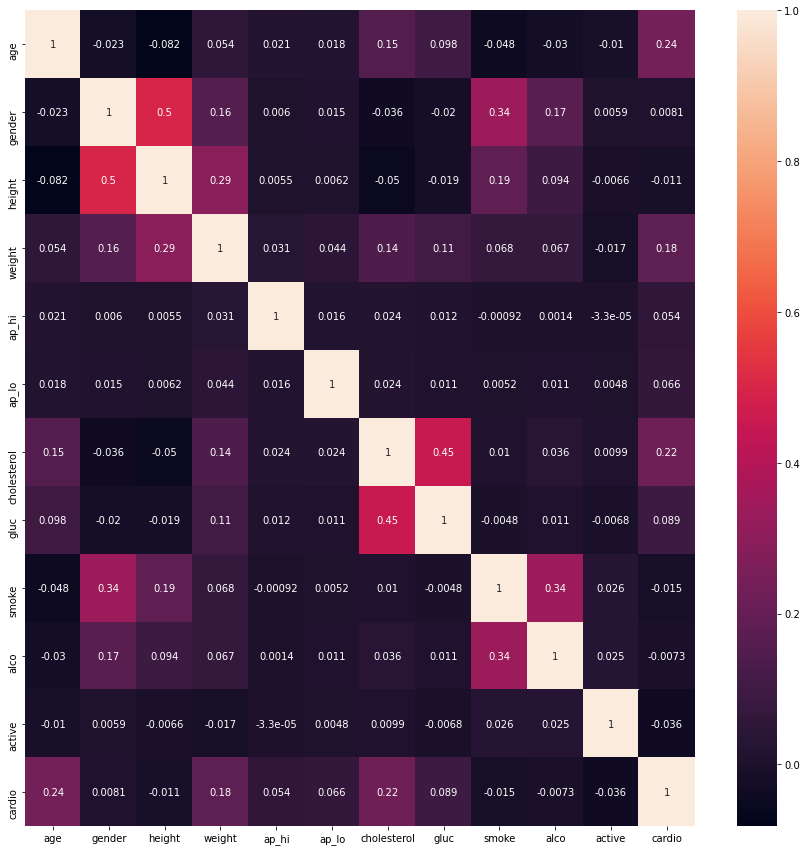

In [91]:
df['cardio'] = target # add cardio column as in upper pictuer
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


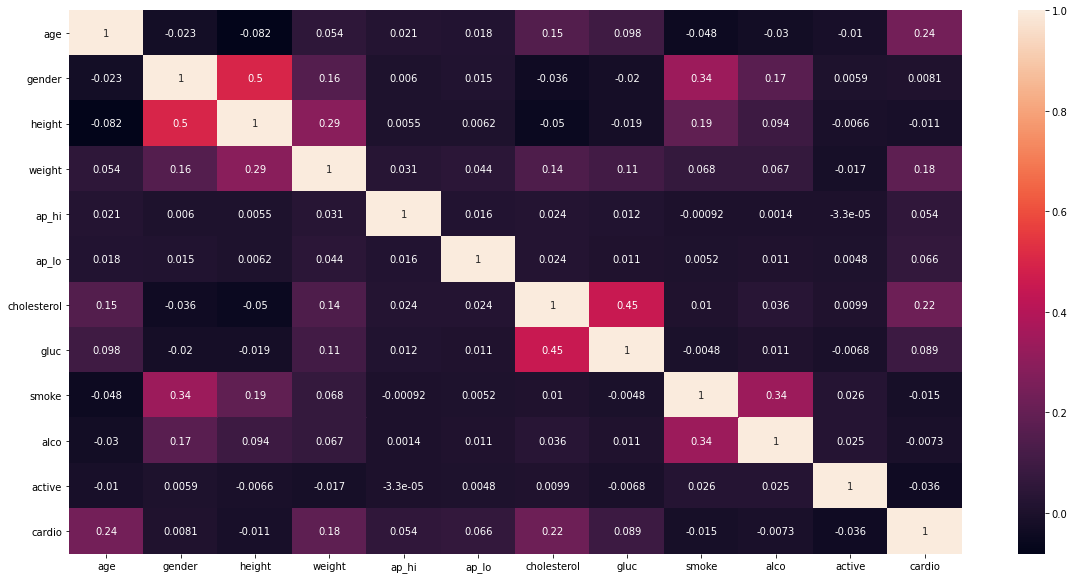

In [92]:
# draw the confusion matrix of the features correlation

cm = df.corr()     # corelations bertween features 
plt.subplots(figsize=(20,10))
sns.heatmap(cm, annot=True);

## Features Histogram
Plot the histogram for all the feature in the dataframe

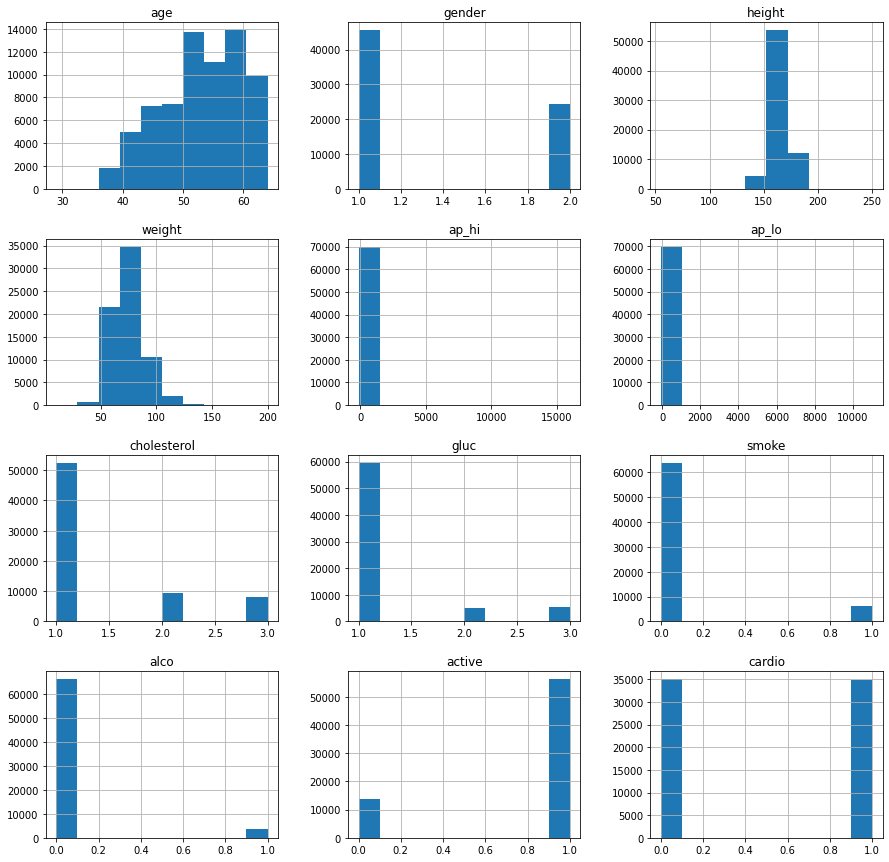

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


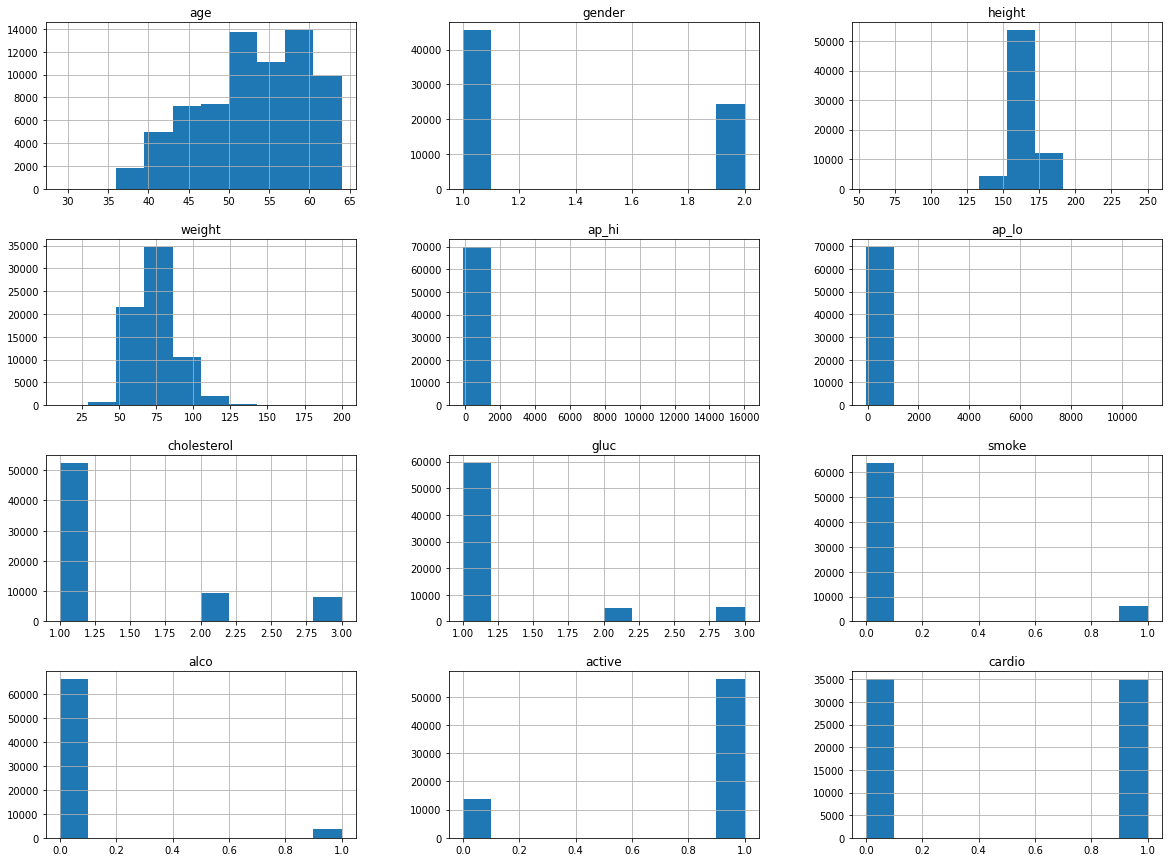

In [93]:
# plot the histogram of all feature in the dataframe


fig, ax = plt.subplots(figsize=(20,15));
df.hist(ax=ax);